<a href="https://colab.research.google.com/github/jul1andav1d/Practice-and-Exercises/blob/main/CORE_Logistic%2C_Random_Forest%2C_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Using the wine cultivars dataset (which involves predicting the type of grape based on their characteristics).




- Your task is to:


1) Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. 

2) After doing that, try using KNN and Random Forest models. 

3) Address these questions in a text cell at the end of your code:

Which model performed the best? 
Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - Coding Dojo/DataSci Week 7 Classification Models/Wine_cultivars.csv')
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df['Class label'].unique()

array([1, 2, 3])

In [ ]:
df.isna().sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#1) LOGISTIC REGRESSION
Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results.

In [ ]:
X = df.drop(columns=['Class label'])
y = df['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

logreg = LogisticRegression()
scaler = StandardScaler()

logregpipe = make_pipeline(scaler, logreg)

logregpipe.fit(X_train, y_train)
print(logregpipe.score(X_train, y_train))
print(logregpipe.score(X_test, y_test))

1.0
0.9777777777777777


In [ ]:
logregpipe.get_params() #checking for tunable params

{'logisticregression': LogisticRegression(),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False}

#l1 Regularization

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

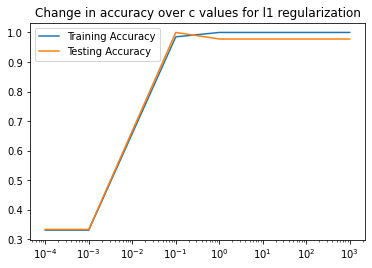

In [ ]:
# Create a list of 'C' values and empty lists for scores
c_values = [0.0001, 0.001, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
      log_reg = LogisticRegression(C=c, max_iter=1000, solver = 'liblinear', penalty = 'l1')
      log_reg_pipe = make_pipeline(scaler, log_reg)
      log_reg_pipe.fit(X_train, y_train) 

      train_scores.append(log_reg_pipe.score(X_train, y_train))
      test_scores.append(log_reg_pipe.score(X_test, y_test))

      #Plot of the change

fig, ax =  plt.subplots(1,1)
ax.plot(c_values, train_scores, label= 'Training Accuracy')
ax.plot(c_values, test_scores, label= 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over c values for l1 regularization')
ax.legend()

#set axis to a logarithmic scale to show the values of c in even intervals
ax.set_xscale('log')

      #Dictionary of values of c and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#l2 Regularization
Changed the code slighty to use l2 regularization

{0.0001: 0.4,
 0.001: 0.8222222222222222,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

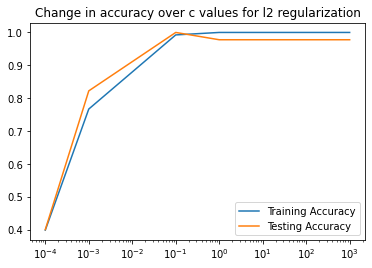

In [ ]:
c_values = [0.0001, 0.001, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
      log_reg = LogisticRegression(C=c, max_iter=1000, penalty = 'l2')
      log_reg_pipe = make_pipeline(scaler, log_reg)
      log_reg_pipe.fit(X_train, y_train) 

      train_scores.append(log_reg_pipe.score(X_train, y_train))
      test_scores.append(log_reg_pipe.score(X_test, y_test))

      #Plot of the change

fig, ax =  plt.subplots(1,1)
ax.plot(c_values, train_scores, label= 'Training Accuracy')
ax.plot(c_values, test_scores, label= 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over c values for l2 regularization')
ax.legend()

ax.set_xscale('log')

      #Dictionary of values of c and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Checking correlation on features

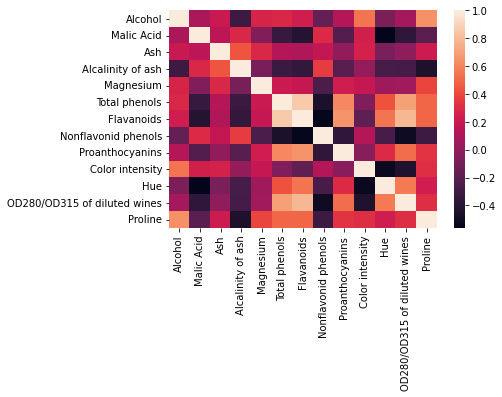

In [ ]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr)

#2) KNN and Random Forest models.

KNN MODEL:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print(y.value_counts(normalize=True))
X.head()

2    0.398876
1    0.331461
3    0.269663
Name: Class label, dtype: float64


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knnpipe = make_pipeline(scaler, knn)
knnpipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
trainpred = knnpipe.predict(X_train)
testpred = knnpipe.predict(X_test)

In [ ]:
knnpipe.score(X_test, y_test)

0.9555555555555556

In [ ]:
knnpipe.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
trainaccuracy = accuracy_score(y_train, trainpred)
print(trainaccuracy)

1.0


In [ ]:
testaccuracy = accuracy_score(y_test, testpred)
print(testaccuracy)

0.9555555555555556


In [ ]:
print('TEST DATA METRICS')
testreport = classification_report(y_test, testpred)
print(testreport)

TEST DATA METRICS
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
#Tuned 'n_neighbors = 1' for best accuracy, after trying different numbers.\
#Decided not to use GridSearch, as this scores are fairly good.

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
rf.get_params() #Looking for params that seem tunable

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rftestpred = rf.predict(X_test)
rftrainpred = rf.predict(X_train)

In [ ]:
#EVALUATE YOUR MODEL WITH R2
rftrain_score = rf.score(X_train, y_train)
rftest_score = rf.score(X_test, y_test)
print(rftrain_score)
print(rftest_score)

0.9903771180030257
0.9134962686567164


In [ ]:
#tunning model, max_depth = 2
rf4 = RandomForestRegressor(max_depth= 4, random_state=42)
rf4.fit(X_train, y_train)
rf4train_score = rf4.score(X_train, y_train)
rf4test_score = rf4.score(X_test, y_test)
print(rf4train_score)
print(rf4test_score)

0.9900256231929736
0.9122211359867329


In [ ]:
#tunning model, max_depth = 10
rf10 = RandomForestRegressor(max_depth= 10, random_state=42)
rf10.fit(X_train, y_train)
rf10train_score = rf10.score(X_train, y_train)
rf10test_score = rf10.score(X_test, y_test)
print(rf10train_score)
print(rf10test_score)

0.9903771180030257
0.9134962686567164


In [ ]:
# DEPTH =8 and Trying 200 trees
rf_200 = RandomForestRegressor(max_depth = 8, n_estimators = 200, random_state = 42)
# Fit the model
rf_200.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9896106325642965
0.9123404850746268


In [ ]:
#Tunning the max_depth to 10 and then changing the amount of trees 
#   hardly made any noticeable improvement to our model.

#It is time consuming MANUALLY trying to find the possibilities for a parameter.
# One way to make this faster is with a function found on 
#the Lessons for Regression trees in Python. (Besides GridSearch)

#I personally liked this one because it allows you to have a visualization as well:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# List of values to try for max_depth:
max_depth_range = list(range(2, 36))
#will try every value between 2 and 36

#List to store the score for each value of max_depth:
r2= []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth= depth,
                                   random_state=42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

Text(0, 0.5, 'R2')

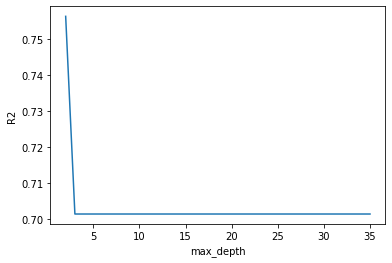

In [ ]:
#To help us see the results of trying various tree depths, 
#the following code creates a visualization of R2 vs max_depth.

import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

#3) QUESTIONS:

Which model performed the best? Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?

In [ ]:
# 1)

   # The model that had the best performance was the Logistic Regression.


#2) 
        #For LOGISTIC REGRESSION
  
  #'C=c'(giving c a list of values ), max_iter= 1000, 
  #solver = 'liblinear' (for regularization l1), penalty = 'l1' and also l2


        #For KNN MODEL

  # Tuned 'n_neighbors = 1' for best accuracy, after trying different numbers.\
  #Decided not to use GridSearch, as this scores are fairly good.


        #For RANDOM FOREST

  # Tuned the depth 'max_depth = ##', and the amount of trees 'n_estimators = ##'

#3)

    # Logistic Regression is the model i liked the best
    # I like the fact that No tuning is usually needed for logistic regression 
    # unless you want to regularize the model. and the scores 
    # on this model with the trainset and 'testdata' were pretty good.